# Time Series

* In this notebook we will study and apply the mathematical and statistical concepts seen in time series.

In [15]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose # using time series analisys lib of statsmodel
from fbprophet import Prophet
# %matplotlib inline

* In the cell above we imported two of the most important libraries in time series forecasting:
    * statsmodel
    * Facebook's Prophet

## Data

In [18]:
dataset1 = "data/Electric_Production.csv"

In [19]:
df = pd.read_csv(dataset1, index_col = 0) #indexing is the date

In [20]:
df.head()

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151


* We have 397 examples and the dates and the values of eletric production

In [21]:
df.shape

(397, 1)

* Converting the index to datetime

In [22]:
df.dtypes

Value    float64
dtype: object

In [25]:
df.index.dtype #object , we need to convert to datetime

dtype('O')

In [26]:
df.index = pd.to_datetime(df.index)

In [30]:
print(df.index.dtype) #ok now
df.index

datetime64[ns]


DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

## Plotting the data

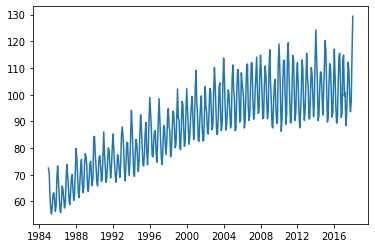

In [32]:
plt.plot(df);

## Decomposing the data with statsmodel

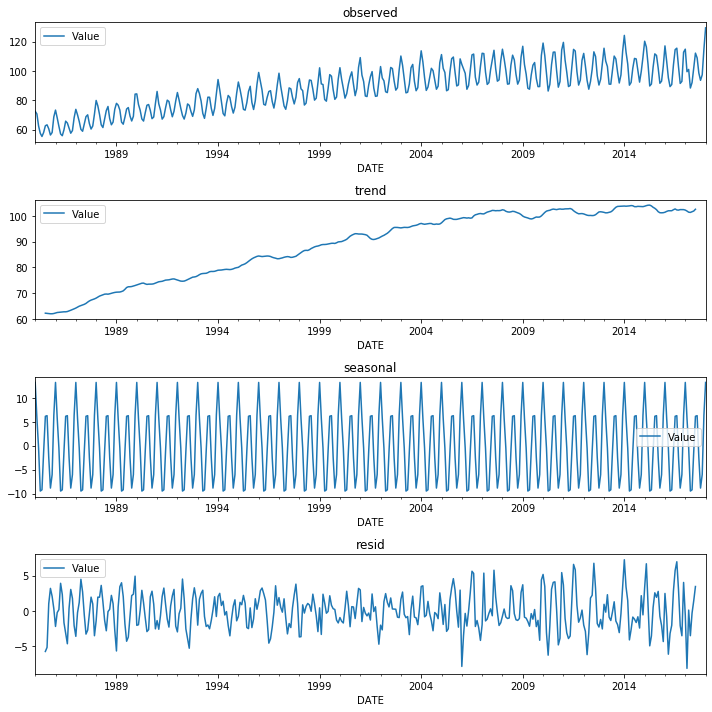

In [43]:
result = seasonal_decompose(df)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(10,10))
result.observed.plot(ax = ax1, title = "observed")
result.trend.plot(ax = ax2, title = "trend")
result.seasonal.plot(ax = ax3, title = "seasonal")
result.resid.plot(ax = ax4, title = "resid")
plt.tight_layout()